# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


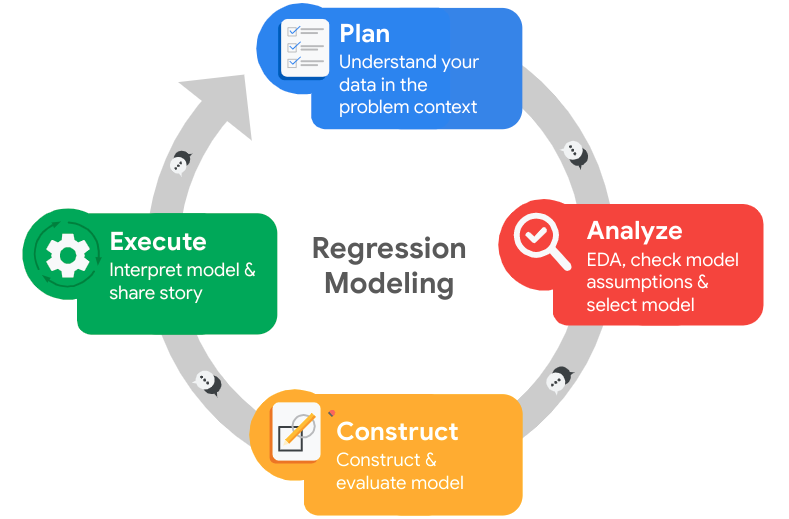

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [81]:
# Import packages

# Packages for numerics + dataframes
import pandas as pd
import numpy as np 

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [82]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [83]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [84]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [85]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [86]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident', 
                          'Department': 'department', 
                          'average_montly_hours': 'average_monthly_hours'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [87]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [88]:
# Check for duplicates
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [89]:
# Inspect some rows containing duplicates as needed
df0.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [90]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df1.head(10))
print(df1.shape)


   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3       

### Check outliers

Check for outliers in the data.

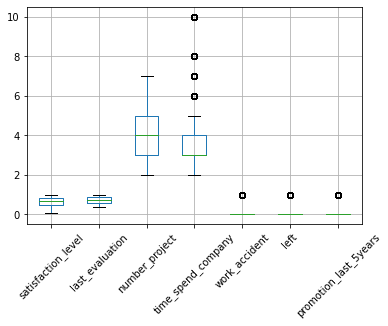

In [91]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
boxplot_data = df1.drop(columns='average_monthly_hours')

boxplot_data.boxplot(rot=45)



In [92]:
# Determine the number of rows containing outliers

# Calculate the 25th percentile of our variables
time_spend_company_25 = df1['time_spend_company'].quantile(0.25)
work_accident_25 = df1['work_accident'].quantile(0.25)
left_25 = df1['left'].quantile(0.25)
promotion_last_5years_25 = df1['promotion_last_5years'].quantile(0.25)

# Calculate the 75th percentile of our variables
time_spend_company_75 = df1['time_spend_company'].quantile(0.75)
work_accident_75 = df1['work_accident'].quantile(0.75)
left_75 = df1['left'].quantile(0.75)
promotion_last_5years_75 = df1['promotion_last_5years'].quantile(0.75)

# Calculate the interquartile range
time_spend_company_iqr = time_spend_company_75 - time_spend_company_25
work_accident_iqr = work_accident_75 - work_accident_25
left_iqr = left_75 - left_25
promotion_last_5years_iqr = promotion_last_5years_75 - promotion_last_5years_25

# Calculate the upper limit
time_spend_company_upper = time_spend_company_75 + 1.5 * time_spend_company_iqr
work_accident_upper = work_accident_75 + 1.5 * work_accident_iqr
left_upper = left_75 + 1.5 * left_iqr
promotion_last_5years_upper = promotion_last_5years_75 + 1.5 * promotion_last_5years_iqr

# Calculate the lower limit
time_spend_company_lower = time_spend_company_25 - 1.5 * time_spend_company_iqr
work_accident_lower = work_accident_25 - 1.5 * work_accident_iqr
left_lower = left_25 - 1.5 * left_iqr
promotion_last_5years_lower = promotion_last_5years_25 - 1.5 * promotion_last_5years_iqr

# Create a mask for the cutoff points
time_spend_company_mask = (df1['time_spend_company'] >= time_spend_company_lower) & (df1['time_spend_company'] <= time_spend_company_upper)
work_accident_mask = (df1['work_accident'] >= work_accident_lower) & (df1['work_accident'] <= work_accident_upper)
left_mask = (df1['left'] >= left_lower) & (df1['left'] <= left_upper)
promotion_last_5years_mask = (df1['promotion_last_5years'] >= promotion_last_5years_lower) & (df1['promotion_last_5years'] <= promotion_last_5years_upper)

#Create dataframes with the mask
time_spend_company_df = df1[time_spend_company_mask].copy()
work_accident_df = df1[work_accident_mask].copy()
left_df = df1[left_mask].copy()
promotion_last_5years_df = df1[promotion_last_5years_mask].copy()

print('Number of outliers in time_spend_company:', len(df1)-len(time_spend_company_df))
print('Number of outliers in work_accident:',len(df1)-len(work_accident_df))
print('Number of outliers in left:',len(df1)-len(left_df))
print('Number of outliers in promotion_last_5years:',len(df1)-len(promotion_last_5years_df))



Number of outliers in time_spend_company: 824
Number of outliers in work_accident: 1850
Number of outliers in left: 1991
Number of outliers in promotion_last_5years: 203


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [93]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print(f"{1991/11991*100:.2f}", '% left the company')
print(f"{10000/11991*100:.2f}", '% stayed at the company')

0    10000
1     1991
Name: left, dtype: int64
16.60 % left the company
83.40 % stayed at the company


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

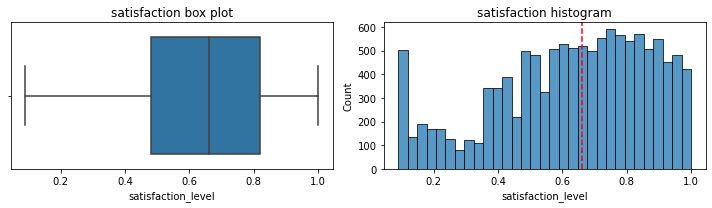

In [94]:
# Boxplot and Histogram for 'satisfaction_level'
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['satisfaction_level'], fliersize=1)
plt.title('satisfaction box plot')

plt.subplot(1, 2, 2)
sns.histplot(x=df1['satisfaction_level'])
median = df1['satisfaction_level'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('satisfaction histogram')

plt.tight_layout()
plt.show()



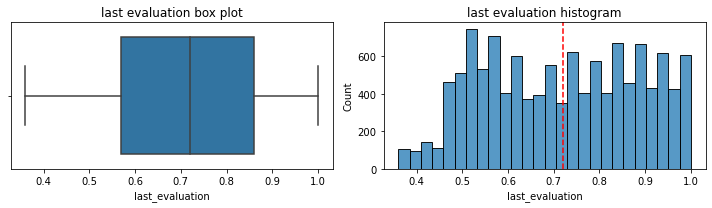

In [95]:
# Boxplot and Histogram for 'last_evaluation'
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['last_evaluation'], fliersize=1)
plt.title('last evaluation box plot')

plt.subplot(1, 2, 2)
sns.histplot(x=df1['last_evaluation'])
median = df1['last_evaluation'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('last evaluation histogram')

plt.tight_layout()
plt.show()



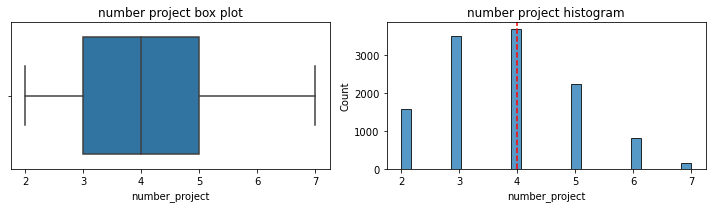

In [96]:
# Boxplot and Histogram for 'number_project'
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['number_project'], fliersize=1)
plt.title('number project box plot')

plt.subplot(1, 2, 2)
sns.histplot(x=df1['number_project'])
median = df1['number_project'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('number project histogram')

plt.tight_layout()
plt.show()


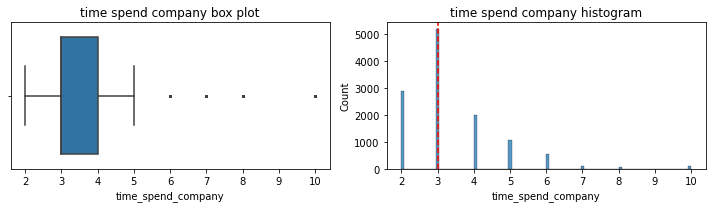

In [97]:
# Boxplot and Histogram for 'time_spend_company'
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['time_spend_company'], fliersize=1)
plt.title('time spend company box plot')

plt.subplot(1, 2, 2)
sns.histplot(x=df1['time_spend_company'])
median = df1['time_spend_company'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('time spend company histogram')

plt.tight_layout()
plt.show()


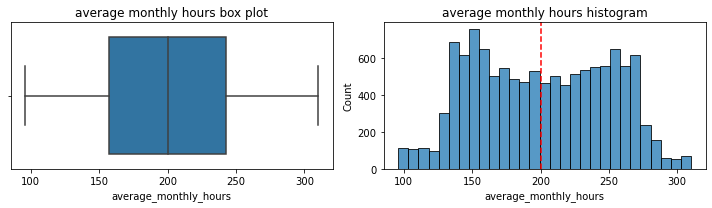

In [98]:
# Boxplot and Histogram for 'average_monthly_hours'
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['average_monthly_hours'], fliersize=1)
plt.title('average monthly hours box plot')

plt.subplot(1, 2, 2)
sns.histplot(x=df1['average_monthly_hours'])
median = df1['average_monthly_hours'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('average monthly hours histogram')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Salifort departments')

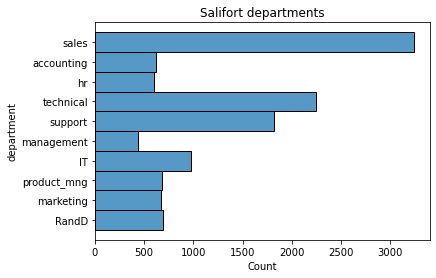

In [99]:
# Histogram for 'departments'
sns.histplot(data=df1, y='department')
plt.title('Salifort departments')

Text(0.5, 1.0, 'salary')

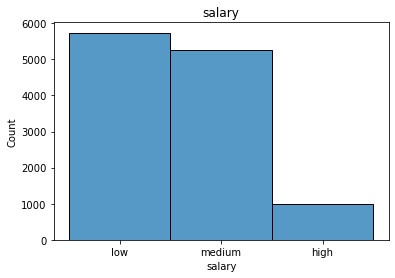

In [100]:
# Histogram for 'salary'
sns.histplot(data=df1, x='salary')
plt.title('salary')

Text(0.5, 1.0, 'Promotion in the past 5 years')

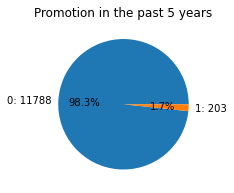

In [101]:
# Pie chart for promotion in the past 5 years
fig = plt.figure(figsize=(3,3))
data = df1['promotion_last_5years'].value_counts()
plt.pie(data,
       labels=[f'{data.index[0]}: {data.values[0]}',
               f'{data.index[1]}: {data.values[1]}'],
       autopct='%1.1f%%'
       )
plt.title('Promotion in the past 5 years')

Text(0.5, 1.0, 'Employees that left')

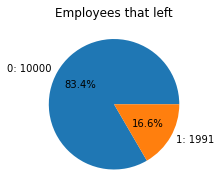

In [102]:
fig = plt.figure(figsize=(3,3))
data = df1['left'].value_counts()
plt.pie(data,
       labels=[f'{data.index[0]}: {data.values[0]}',
               f'{data.index[1]}: {data.values[1]}'],
       autopct='%1.1f%%'
       )
plt.title('Employees that left')

Text(0.5, 1.0, 'Employees who experienced an at work accident')

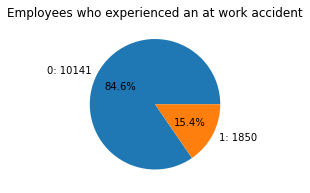

In [103]:
fig = plt.figure(figsize=(3,3))
data = df1['work_accident'].value_counts()
plt.pie(data,
       labels=[f'{data.index[0]}: {data.values[0]}',
               f'{data.index[1]}: {data.values[1]}'],
       autopct='%1.1f%%'
       )
plt.title('Employees who experienced an at work accident')

### Insights

Observations from each individual variables:
* satisfaction_level: From what we can observe in the boxplot, most of the data lies in between the values of 0.5-0.8. This may indicate that the majority of the employees are atleast somewhat satisfied. In the histogram we can observe a left skewed distributions with a tall spike in the 0 value. What we can interpret is that even though the majority seem somewhat satisfied there is a large number of completely dissatisfied employees, most likely the ones who left the company.

* last_evaluation: the majority of the values lie inbetween the values of 0.6-0.8 which shows that the majority of workers work adequately, while the left side is very under represented.

* number_project: at minimum employees are working on 2 projects with the majority working on 4. There are also some values where employees are working on 7 different projects.

* time_spend_company: the majority of the workforce is composed of new employees. The majority lie inbetween 3-4 years, there are only a few outliers beyond 5 years and the most veteran employee has been in the company for 10 years.

* average_monthly_hours: seems to be the only variable somewhat normally distributed showing the majority of the data inbetween the values of 160-240 hours per month. The average is 200 hours, meaning that the average employee is clocking in 10 hours a day.

* department: the majority of the workforce are only part of 3 departments, sales, technical and support. This might mean an understaffing in other fundamental departments which might indicate that these employees are the ones to mostly quit the company.

* salary: only 1000 employees are considered to have a high salary, while the majority are in the low salary bracket.

* promotion_last_5years: promotions are scarce, only 1.7% of employees have received one in the past 5 years.

* left: we can see that 16.6% of the staff have either left or been terminated.

* work_accident: there is a very high rate of work related accidents where 1850 or 15.4% of employees have experienced an accident.

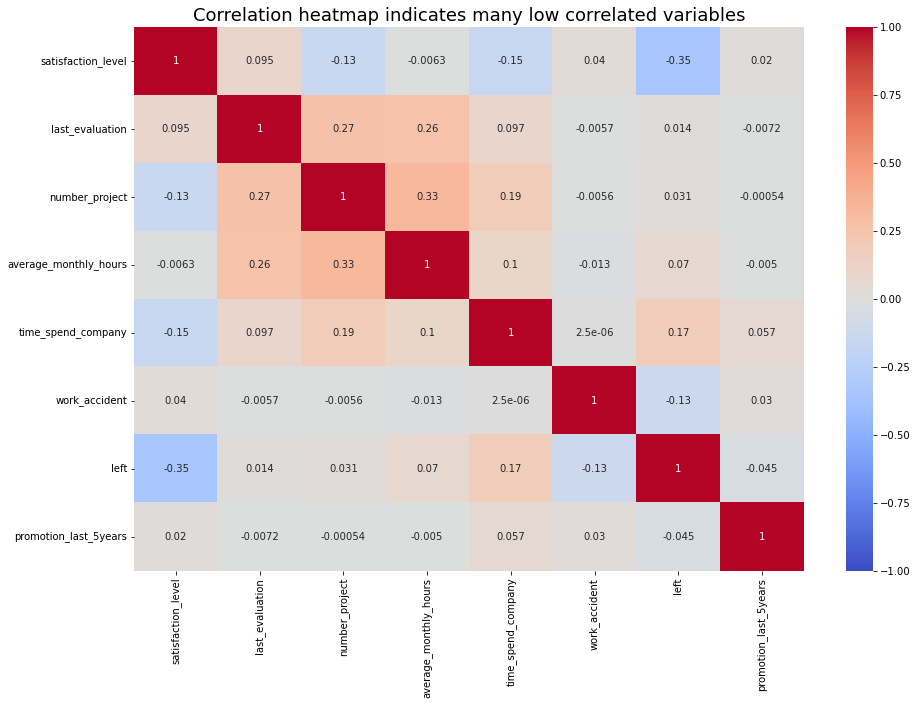

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

There doesn't seem to be any strong correlation between these variables. The strongest relationships are between 'average_monthly_hours' and 'number_project' with a positive coefficient of 0.33. This would make sense as the number of projects increases, the more hours an employee would have to spend in total. 

A not so surprising correlation is between 'left' and 'satisfaction_level' with a negative correlation coefficient of -0.35, indicating that the lower satisfaction values are from the employees that left.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

#### Convert categorical data `department` and `salary` into numeric

We want to convert these variables into numeric through one-hot encoding.

In [105]:

df2 = pd.get_dummies(df1, drop_first=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Modeling

Add as many cells as you need to conduct the modeling process.

**1. Isolate our target variable and its predictors**

In [106]:
# Isolate target variable 
y = df2['left']
# Isolate predictor variables
X = df2.drop(columns = ['left'])

**2. Peform the train-test split**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
984,0.75,0.86,5,260,5,0,0,0,0,0,0,0,0,0,0,0,1,0
610,0.09,0.95,7,256,4,0,0,0,0,0,0,1,0,0,0,0,0,1
7033,0.68,0.61,3,134,4,0,0,0,0,0,0,0,0,1,0,0,0,1
6411,0.59,0.75,4,190,2,0,0,0,0,0,0,0,0,1,0,0,0,1
8388,0.59,0.79,3,217,4,0,0,0,0,0,0,0,1,0,0,0,0,1


**3. Instantiate a logistic regression model and fit the data**

In [108]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**4. Obtain the coefficients of each variable**

In [109]:
# Coefficients for the explanatory variables
pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -3.908104
last_evaluation           0.608780
number_project           -0.286396
average_monthly_hours     0.003782
time_spend_company        0.304267
work_accident            -1.378512
promotion_last_5years    -0.796774
department_RandD         -0.533757
department_accounting    -0.056739
department_hr            -0.011719
department_management    -0.382576
department_marketing     -0.052219
department_product_mng   -0.150381
department_sales         -0.009022
department_support       -0.050822
department_technical      0.030964
salary_low                1.639541
salary_medium             1.236592
dtype: float64

In [110]:
# Intercept of the model
model.intercept_

array([-1.79830347])

### Check for model assumptions

**1. Check for linearity**

In [111]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.81662176, 0.18337824],
       [0.55152661, 0.44847339],
       [0.87997835, 0.12002165],
       ...,
       [0.98087648, 0.01912352],
       [0.89520321, 0.10479679],
       [0.53329366, 0.46670634]])

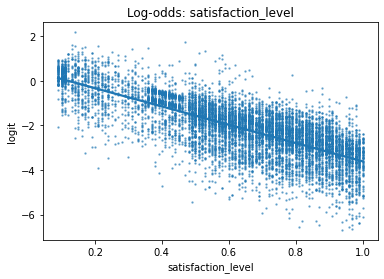

In [112]:
# 1. Make a copy of the X_train data
logit_data = X_train.copy()

# 2. Create a `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

# 3. Plot a regplot log-odds for each continuous and discrete variables
# Regplot 'satisfaction_level' log-odds
sns.regplot(x='satisfaction_level', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha':0.5})
plt.title('Log-odds: satisfaction_level');

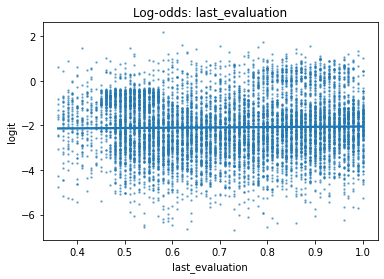

In [113]:
# Regplot 'last_evaluation' log-odds
sns.regplot(x='last_evaluation', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha':0.5})
plt.title('Log-odds: last_evaluation');

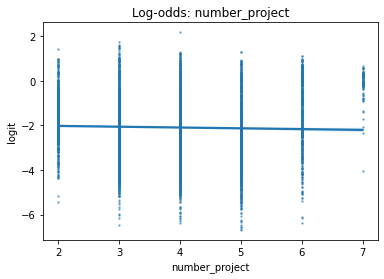

In [114]:
# Regplot 'number_project' log-odds
sns.regplot(x='number_project', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha':0.5})
plt.title('Log-odds: number_project');

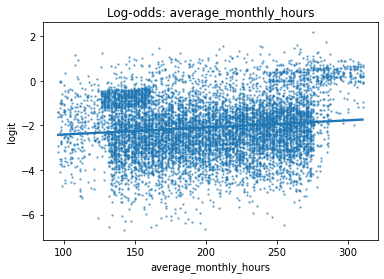

In [115]:
# Regplot 'average_monthly_hours' log-odds
sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha':0.5})
plt.title('Log-odds: average_monthly_hours');

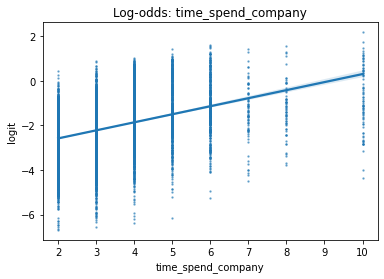

In [116]:
# Regplot 'time_spend_company' log-odds
sns.regplot(x='time_spend_company', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha':0.5})
plt.title('Log-odds: time_spend_company');

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear.

From the visualizations we can observe this linear regressions in our variables and make the assumption of linearity.

**We will make the assumptions of independent observations, no multicollinearity and no extreme oultiers as we have observed in our data there is no strong relationship between our variables.**

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [117]:
# 1. Make predictions on the test data
y_preds = model.predict(X_test)

# 2. Score the model on the test data
# Accuracy score
print('Accuracy score:', accuracy_score(y_test, y_preds))

# Precision score
print('Precision score:', precision_score(y_test, y_preds))

#Recall score
print('Recall score:', recall_score(y_test, y_preds))

#F1 score
print('f1 score:', f1_score(y_test, y_preds))

Accuracy score: 0.8348899266177452
Precision score: 0.5076142131979695
Recall score: 0.20080321285140562
f1 score: 0.28776978417266186


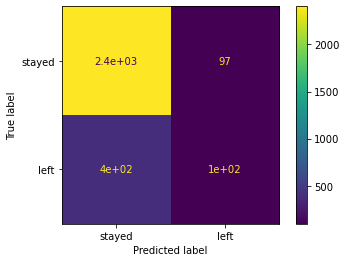

In [118]:
# 3. Create a confusion matrix and display the results
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'],
                             )
disp.plot();

In [119]:
# 4. Create a visualization of the importance of features
# Create a list of (column_name, coefficients) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('salary_low', 1.6395414029574094),
 ('salary_medium', 1.2365922282271133),
 ('last_evaluation', 0.6087798479752682),
 ('time_spend_company', 0.30426700745664387),
 ('department_technical', 0.030964068626960058),
 ('average_monthly_hours', 0.0037819514641777106),
 ('department_sales', -0.009021674757287991),
 ('department_hr', -0.011718653131598466),
 ('department_support', -0.05082177741323919),
 ('department_marketing', -0.0522188742058524),
 ('department_accounting', -0.056739387790297476),
 ('department_product_mng', -0.15038073258066464),
 ('number_project', -0.2863956780517469),
 ('department_management', -0.38257560212210134),
 ('department_RandD', -0.5337565303694481),
 ('promotion_last_5years', -0.7967736541250716),
 ('work_accident', -1.3785120104841444),
 ('satisfaction_level', -3.9081036392303843)]

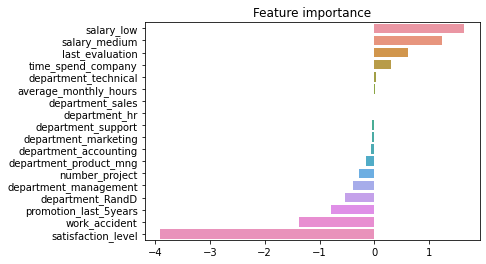

In [120]:
sns.barplot(x=[x[1] for x in feature_importance],
           y =[x[0] for x in feature_importance],
           orient='h')
plt.title('Feature importance');


### Summary of model results

**Model performance**

Our model overall did not have a good performance according to our key metrics:

- Accuracy was high with a score of 0.8348, which indicates that the model is good at predicting correctly classified data points. In our model this would mean that overall it was capable of predicting who left who stayed at the company.

- Our precision score wasn't as high with a value of 0.5076, which measures the proportion of data points predicted as true that are actually true. For this model it would mean that only 50.76% of true variables were predicted as such, therefore our model doesn't do a great job at predicting when an employee leaveas the company.

- Recall is the lowest score for this model with a value of 0.2. This would mean that that out of all the data points that are actually true our model could only predict 20% of these values. Further confirming that this model doesn't perform well at predicting when an employee left.

- F1 score is the harmonic mean of precision and recall, by combining them it gives them equal weight and its value gives us an overall understanding of how good of a predictor is our model. Since our models f1 score value is only 0.2877 this tells us that overall our model is not a good predictor of true data points, or in other words our model doesn't do a good job at predicting employees that have left the company.

From the visualization of the confusion matrix we can see that the model did very well at predicting true negative values, or in other words the model predicted most of the time employees that stayed at the company. But as we have seen from our metrics, the model had a hard time determining employees that left the company. There are some factors that could have affected the models performance:

- The distribution of the data and the under representation of employees that left the company. Even though the company has a large turnover rate, employees that left are proportionally smaller to the ones currently in the company. This skews the data and doesn't give our model enough to train and correctly predict these data points. A solution could be to increase the ammount of data the model trains with or if possible increase the dataset.

- There may be too many variables in the model, or simply not have better predictors of employee turnover. We could potentially go back and reconstruct the model to include more relevant variables or reduce some of the less predictive variables to give us an easier model to interpret.

- This model may not be the appropriate type for this data. Even if a logistic regression can be a poweful model, there may be other better performing models that could give better results or more accuarately predict employees that leave the company.

**Model interpretation and variable importance**

Our variable of interest is employees that have left the company, the variables that had the highest impact in determining if an employee left the company are:

-`satisfaction_level`: the coeffient for this variable is -3.908, this is the highest impact in our explanatory variables. This means that as satisfaction level increases there is a less likelyhood that an employee will leave the company. And the opposite is true, the more unsatisfied an employee is the lhigher the chance that they will leave the company.

-`work_accident`: this variable measures the likelihood of an employee leaving if they have a work related accident. Surprisingly it has a coefficient of -1.37 meaning that an employee will likely stay if they had one of these accidents. This may be that the employees are protected against the company or the company holds a legal responsibilty of maintaining these employees.

-`salary_low` and `salary_medium`: salary plays a large part in determining if an employee will stay or leave. The coefficients for these variables are 1.63 and 1.23 respectively, meaning that if an employees salary is categorized as such the higher the chance an employee will leave.

-`promotion_last_5years`: the coefficient of this variable is -0.796, this means that employees who have received a promotion in the recent past are less likely to leave the company. This could be a signal for the company on how to retain better its employees.

-`last_evaluation`: this measures the performance of employees according to the company. The coeffiecient for this variable is 0.608, which we can interpret as the higher the evaluation of an employee the higher the chance they will leave the company. This could be interpreted as employees that are high performers feeling undervalued leaving the company for better opportunities meaning that the company does little do appreciate its talent and is left with less efficient employees.

-`time_spend_company`: the value is 0.304 meaning that the longer an employee has stayed at the company the higher the chance they will leave. As seen in the intial EDA, there aren't a lot of veteran employees, most of the workforce has only been with the company for less than 5 years. Ths indicates there is little room for internal growth in the company and more experienced employee seek other opportunities.

-`number_project` and `average_monthly_hours`: these variables give us information on how much work an employee takes on, the coefficients aren't very significant with values of -0.28 and  0.003. As these variables were somewhat correlated its surprising they have opposite values. As the number of projects increases the less likely an employee will leave and the more hours an employee works on average the higher the chance an employee would leave. These values are not very significant and really don't have much of an impact.

-`departments`: this is the least conclusive variable. Only 2 departments show any significant impact on employees leaving, managerial and R&D positions have negative coefficients indicating they are less likely to leave.

### Conclusion, Recommendations, Next Steps

**Conclusions**

This data set provided by Salifort Motors contains information on its current and past employees, detailing information on their satisfaction, performance, work load, tenure, salary, work related accidents and departments. Its main purpose is to understand why past employees have left the company and mitigate the high turnover rates. The model selected for this project was a logistic regression mdoel as it is a powerful technique for categorical prediction tasks.

The model performance overall was subpar, as from our metrics we determined that the model is not great at predicting when an employee leaves the company but does well at determining when an employee will stay. Some recomendations and next steps:

1. Practice feature engineering to obtain new varaibles that better predict employees that leave. Or try to add new data that can help the model become more robust. Also remove features that dont have a lot of predictive power and help simplify the model.

2. Implement different machine learning models that could potentially have better results such as a decision tree, random forest etc. and play around with hyperparameters and crossvalidate to determine the best models.

3. I would recommend the company take these results with a grain of salt, as mentioned the model is not a great predictor. But it is a good stepping stone for other projects and there are still some information that is useful.

Based on this model and the provided data I would not give any decisive advice to the company, but the model has shown that employees that have been retained are motivated by:

- Satisfaction, there is a clear relationship between satisfied employees and employees that stay in the company. The company could survey the employees on what are the aspects of work that satisfy them.

- Salary and promotions, it is reasonable to understand that incentives motivate employees to stay at a company. As shown there seems to be little growth opportunities, this could be an area of major focus as we have also seen that employees with high evaluations tend to leave. It would be better to help employees understand how to obtain these incentives and give a clear path so they can retain talent in the company.

A deeper understanding of why employees leave could be accessed through more data or further investigation, but it is already a good plan of action understanding what made employees stayed in the company and analyze if these changes have an impact.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.